1.描述性统计分析

In [82]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
#忽略警告
warnings.filterwarnings('ignore')

In [83]:
#加载数据
train=pd.read_csv('hospital.csv')
#防止丢失原始数据进行拷贝
train_original=train.copy()
#查看前几行
train.head()

,ID,hospital,region,level,disease,year,month,gender,age,marry,...,v97,v98,v99,filter_$,v85_96,v87_98,v88_89_91,lgv83,lgv29,age_cls
0,5901,406,1,3,4659,2000,1,2,0.786301,1,...,0,0,2,1,0,30,0,2.507856,0.60206,2
1,70901,438,3,3,4659,2000,5,2,0.800000,1,...,6,6,2,1,54,18,0,2.164353,0.30103,2
2,88901,438,3,3,4659,2000,6,1,0.808219,1,...,12,5,2,1,6,30,0,2.414973,0.30103,2
3,52201,438,3,3,4659,2000,3,1,0.810959,1,...,6,6,2,1,0,54,0,2.176091,0.30103,2
4,12701,438,3,3,4659,2000,1,1,0.813699,1,...,12,9,2,1,40,80,0,2.546543,0.60206,2


In [84]:
train.shape

(2673, 54)

In [85]:
train.columns

Index(['ID', 'hospital', 'region', 'level', 'disease', 'year', 'month',
       'gender', 'age', 'marry', 'v10', 'v20', 'v26', 'v29', 'v41', 'v43',
       'v44', 'v46', 'v55', 'v52', 'v53', 'v54', 'v57', 'v58', 'v56', 'v73',
       'v74', 'v75', 'v76', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88',
       'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98',
       'v99', 'filter_$', 'v85_96', 'v87_98', 'v88_89_91', 'lgv83', 'lgv29',
       'age_cls'],
      dtype='object')

In [86]:
train.dtypes

ID            object
hospital       int64
region         int64
level          int64
disease        int64
year           int64
month          int64
gender         int64
age          float64
marry         object
v10            int64
v20           object
v26            int64
v29            int64
v41           object
v43            int64
v44            int64
v46            int64
v55            int64
v52            int64
v53            int64
v54            int64
v57            int64
v58            int64
v56           object
v73            int64
v74            int64
v75            int64
v76            int64
v82            int64
v83            int64
v84            int64
v85            int64
v86            int64
v87            int64
v88            int64
v89            int64
v90            int64
v91            int64
v92            int64
v93            int64
v94            int64
v95            int64
v96            int64
v97            int64
v98            int64
v99            int64
filter_$     

In [87]:
train.describe()

,hospital,region,level,disease,year,month,gender,age,v10,v26,...,v97,v98,v99,filter_$,v85_96,v87_98,v88_89_91,lgv83,lgv29,age_cls
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,...,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,302.069959,2.000000,2.000000,4822.351665,2000.360269,4.921811,1.386083,52.382144,1.013468,1.147026,...,107.144407,19.928545,1.960718,0.933034,430.599327,141.221848,97.743734,3.280464,1.009447,11.866442
std,160.922676,0.820763,0.820763,1142.794333,0.480168,3.158409,0.486941,23.114378,0.115289,0.367677,...,273.394864,135.909188,0.194301,0.250010,1102.179977,278.745438,282.431118,0.544730,0.496347,4.611125
min,70.000000,1.000000,1.000000,1629.000000,2000.000000,1.000000,1.000000,0.786301,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.591065,0.000000,2.000000
25%,104.000000,1.000000,1.000000,4140.000000,2000.000000,2.000000,1.000000,37.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,10.000000,0.000000,2.953276,0.698970,9.000000
50%,290.000000,2.000000,2.000000,4556.000000,2000.000000,4.000000,1.000000,60.000000,1.000000,1.000000,...,6.000000,0.000000,2.000000,1.000000,50.000000,45.000000,0.000000,3.267172,1.000000,13.000000
75%,450.000000,3.000000,3.000000,4919.000000,2001.000000,7.000000,2.000000,71.000000,1.000000,1.000000,...,89.000000,6.000000,2.000000,1.000000,321.000000,152.000000,0.000000,3.640481,1.342423,16.000000
max,518.000000,3.000000,3.000000,8738.000000,2001.000000,12.000000,2.000000,99.000000,2.000000,4.000000,...,5895.000000,6223.000000,2.000000,1.000000,18614.000000,6935.000000,2760.000000,4.986615,2.638489,21.000000


In [88]:
train.isnull().sum()

ID           0
hospital     0
region       0
level        0
disease      0
year         0
month        0
gender       0
age          0
marry        0
v10          0
v20          0
v26          0
v29          0
v41          0
v43          0
v44          0
v46          0
v55          0
v52          0
v53          0
v54          0
v57          0
v58          0
v56          0
v73          0
v74          0
v75          0
v76          0
v82          0
v83          0
v84          0
v85          0
v86          0
v87          0
v88          0
v89          0
v90          0
v91          0
v92          0
v93          0
v94          0
v95          0
v96          0
v97          0
v98          0
v99          0
filter_$     0
v85_96       0
v87_98       0
v88_89_91    0
lgv83        0
lgv29        0
age_cls      0
dtype: int64

In [89]:
#对每个变量进行分析
#目标变量
train['hospital'].value_counts() #频率

400    300
450    300
518    300
87     300
290    294
70     207
438    204
205    180
152    134
511     96
100     93
225     85
406     81
104     69
234     30
Name: hospital, dtype: int64

In [90]:
train['hospital'].value_counts(normalize=True)#百分比

400    0.112233
450    0.112233
518    0.112233
87     0.112233
290    0.109989
70     0.077441
438    0.076319
205    0.067340
152    0.050131
511    0.035915
100    0.034792
225    0.031799
406    0.030303
104    0.025814
234    0.011223
Name: hospital, dtype: float64

<AxesSubplot:>

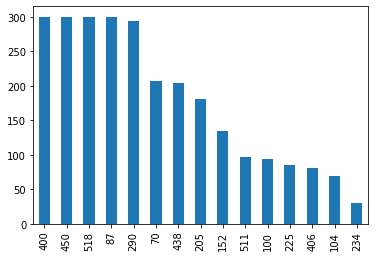

In [91]:
train['hospital'].value_counts().plot.bar()

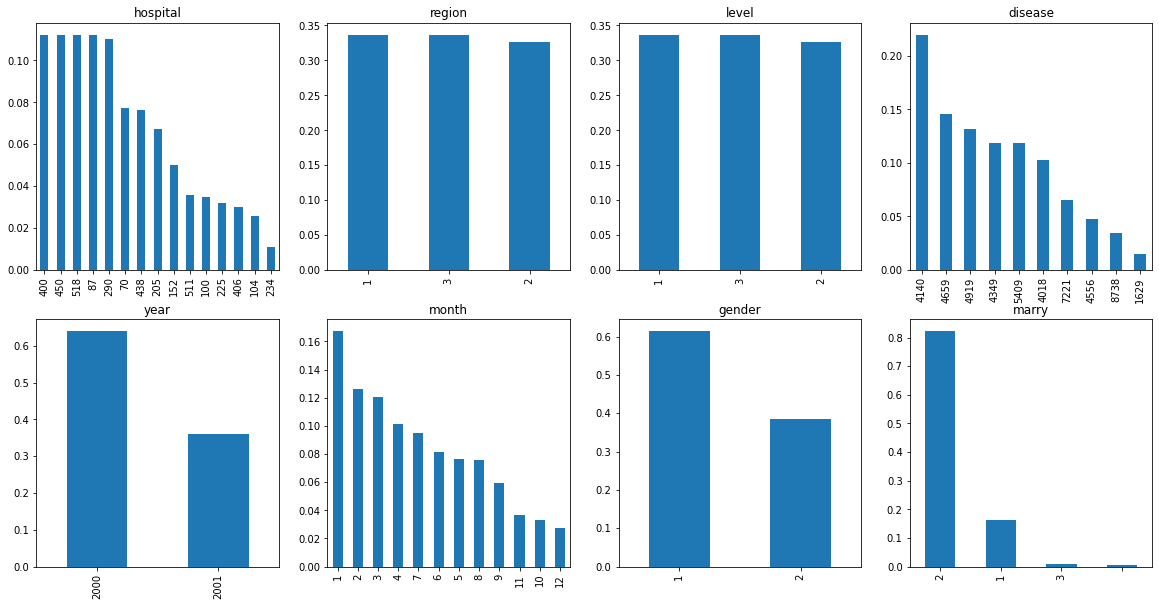

In [92]:
plt.subplot(241) #两行三列第一个
train['hospital'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'hospital')

plt.subplot(242)
train['region'].value_counts(normalize=True).plot.bar(title= 'region')

plt.subplot(243)
train['level'].value_counts(normalize=True).plot.bar(title= 'level')

plt.subplot(244)
train['disease'].value_counts(normalize=True).plot.bar(title= 'disease')

plt.subplot(245)
train['year'].value_counts(normalize=True).plot.bar(title= 'year')
plt.subplot(246)
train['month'].value_counts(normalize=True).plot.bar(title= 'month')
plt.subplot(247)
train['gender'].value_counts(normalize=True).plot.bar(title= 'gender')
plt.subplot(248)
train['marry'].value_counts(normalize=True).plot.bar(title= 'marry')
plt.show()


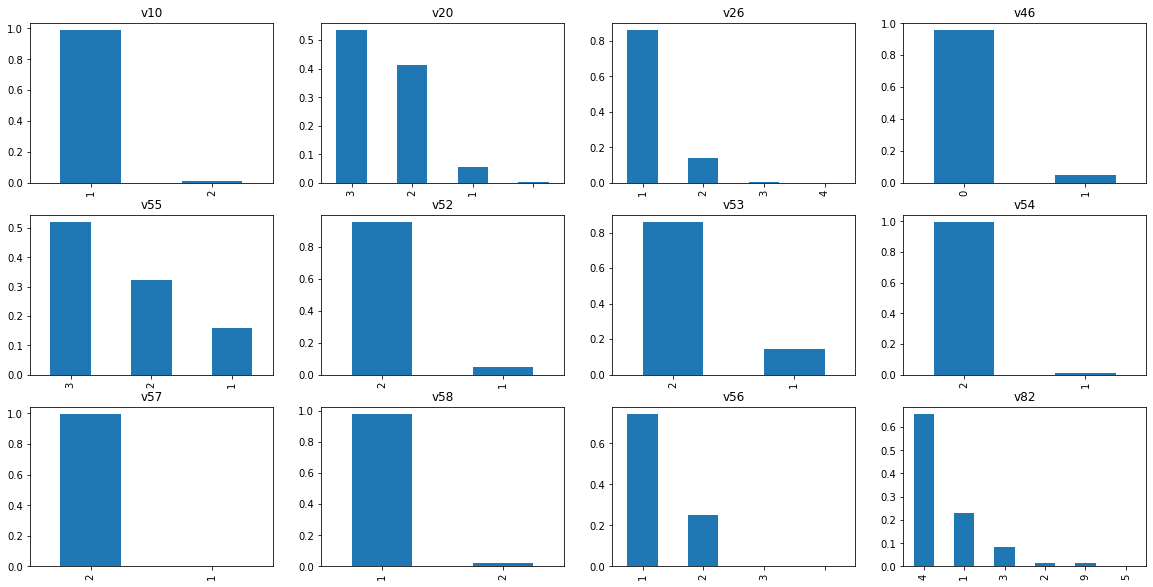

In [93]:
#对住院期间特征进行分析
plt.subplot(341) #两行三列第一个
train['v10'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'v10')

plt.subplot(342)
train['v20'].value_counts(normalize=True).plot.bar(title= 'v20')

plt.subplot(343)
train['v26'].value_counts(normalize=True).plot.bar(title= 'v26')

plt.subplot(344)
train['v46'].value_counts(normalize=True).plot.bar(title= 'v46')

plt.subplot(345)
train['v55'].value_counts(normalize=True).plot.bar(title= 'v55')
plt.subplot(346)
train['v52'].value_counts(normalize=True).plot.bar(title= 'v52')
plt.subplot(347)
train['v53'].value_counts(normalize=True).plot.bar(title= 'v53')
plt.subplot(348)
train['v54'].value_counts(normalize=True).plot.bar(title= 'v54')
plt.subplot(349)
train['v57'].value_counts(normalize=True).plot.bar(title= 'v57')
plt.subplot(3,4,10)
train['v58'].value_counts(normalize=True).plot.bar(title= 'v58')
plt.subplot(3,4,11)
train['v56'].value_counts(normalize=True).plot.bar(title= 'v56')
plt.subplot(3,4,12)
train['v82'].value_counts(normalize=True).plot.bar(title= 'v82')
plt.show()


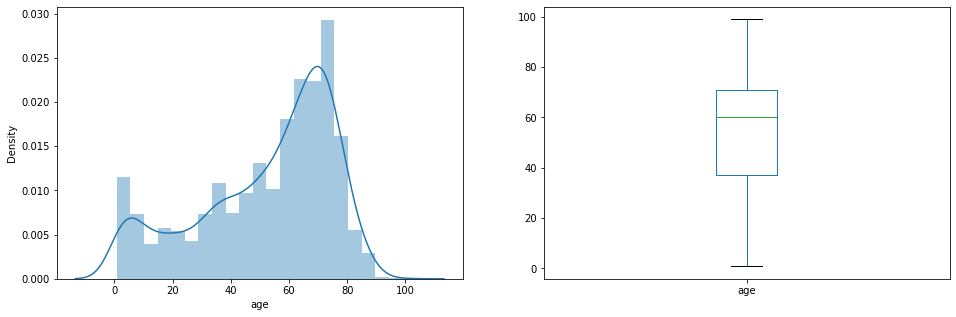

In [94]:
#连续型
#分布直方图和箱型图 sns.distplot  train[].plot.box()
plt.subplot(121)
sns.distplot(train['age'])

plt.subplot(122)
train['age'].plot.box(figsize=(16,5))

plt.show()

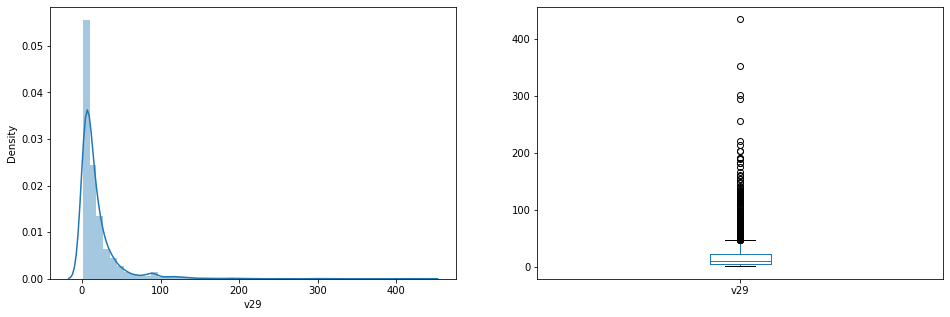

In [95]:
plt.subplot(121)
sns.distplot(train['v29'])

plt.subplot(122)
train['v29'].plot.box(figsize=(16,5))

plt.show()

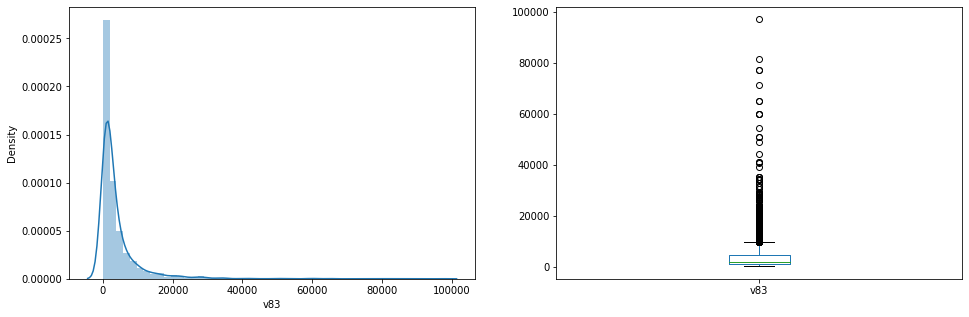

In [96]:
#目标标量
plt.subplot(121)
sns.distplot(train['v83'])

plt.subplot(122)
train['v83'].plot.box(figsize=(16,5))

plt.show()

2.数据预处理

In [97]:
#降维
#删除不必要的变量
train=train.drop('ID', axis=1)
train=train.drop('disease', axis=1)
train=train.drop('v10', axis=1)
train=train.drop('v54', axis=1)
train=train.drop('v41', axis=1)
train=train.drop('v43', axis=1)
train=train.drop('v44', axis=1)
train=train.drop('v57', axis=1)
train=train.drop('v58', axis=1)
train=train.drop('v82', axis=1)
train=train.drop('v84', axis=1)
train=train.drop('v85', axis=1)
train=train.drop('v86', axis=1)
train=train.drop('v87', axis=1)
train=train.drop('v88', axis=1)
train=train.drop('v89', axis=1)
train=train.drop('v90', axis=1)
train=train.drop('v91', axis=1)
train=train.drop('v92', axis=1)
train=train.drop('v93', axis=1)
train=train.drop('v94', axis=1)
train=train.drop('v95', axis=1)
train=train.drop('v96', axis=1)
train=train.drop('v97', axis=1)
train=train.drop('v98', axis=1)
train=train.drop('v99', axis=1)

In [98]:
train=train.drop('filter_$', axis=1)
train=train.drop('v83', axis=1)
train=train.drop('v29', axis=1)
train=train.drop('age_cls', axis=1)

In [99]:
train.head()

,hospital,region,level,year,month,gender,age,marry,v20,v26,...,v56,v73,v74,v75,v76,v85_96,v87_98,v88_89_91,lgv83,lgv29
0,406,1,3,2000,1,2,0.786301,1,3,1,...,2,2,2,2,2,0,30,0,2.507856,0.60206
1,438,3,3,2000,5,2,0.800000,1,2,1,...,1,2,2,2,2,54,18,0,2.164353,0.30103
2,438,3,3,2000,6,1,0.808219,1,2,1,...,1,2,2,2,2,6,30,0,2.414973,0.30103
3,438,3,3,2000,3,1,0.810959,1,3,1,...,1,1,2,2,2,0,54,0,2.176091,0.30103
4,438,3,3,2000,1,1,0.813699,1,3,1,...,1,2,2,2,2,40,80,0,2.546543,0.60206


In [100]:
#特征转换
#把12个月份转为4个季度
def assign_label(h):
    if h >0 and h <= 3:
        return 1
    elif h > 3 and h <=6:
        return 2
    elif h >=7 and h <=9 :
        return 3
    elif h >= 10 and h <= 12:
        return 4

train["month_label"] = train["month"].apply(assign_label)
del train['month']

#年龄离散化
def assign_age(h):
    if h >=0 and h < 12:
        return 1
    elif h >= 12 and h <=18:
        return 2
    elif h > 18 and h <=30:
        return 3
    elif h > 30 and h <=45:
        return 4
    else:
        return 5
    

train["age_label"] = train["age"].apply(assign_age)
del train['age']

In [101]:
train['year'].replace(2000,0,inplace=True)
train['year'].replace(2001,1,inplace=True)

In [102]:
train.head()

,hospital,region,level,year,gender,marry,v20,v26,v46,v55,...,v74,v75,v76,v85_96,v87_98,v88_89_91,lgv83,lgv29,month_label,age_label
0,406,1,3,0,2,1,3,1,0,2,...,2,2,2,0,30,0,2.507856,0.60206,1,1
1,438,3,3,0,2,1,2,1,0,3,...,2,2,2,54,18,0,2.164353,0.30103,2,1
2,438,3,3,0,1,1,2,1,0,3,...,2,2,2,6,30,0,2.414973,0.30103,2,1
3,438,3,3,0,1,1,3,1,0,3,...,2,2,2,0,54,0,2.176091,0.30103,1,1
4,438,3,3,0,1,1,3,1,0,3,...,2,2,2,40,80,0,2.546543,0.60206,1,1


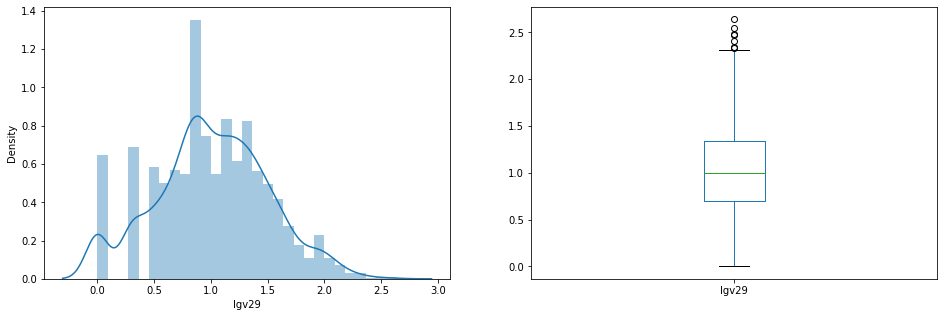

In [104]:
plt.subplot(121)
sns.distplot(train['lgv29'])

plt.subplot(122)
train['lgv29'].plot.box(figsize=(16,5))

plt.show()

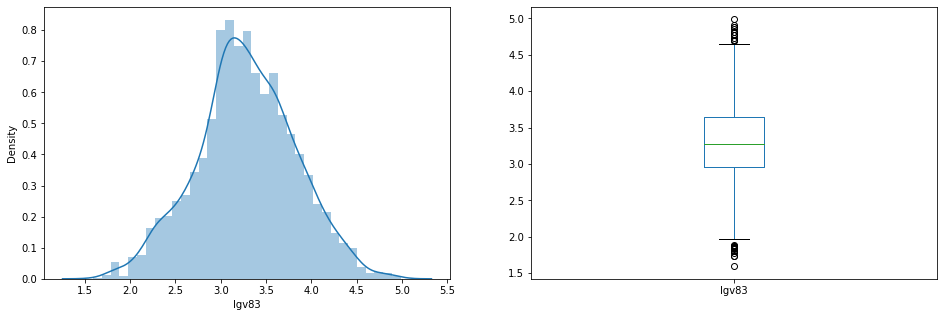

In [103]:
#目标变量标准化
plt.subplot(121)
sns.distplot(train['lgv83'])

plt.subplot(122)
train['lgv83'].plot.box(figsize=(16,5))

plt.show()

3.探索性数据分析

In [ ]:
plt.subplot(241) #两行三列第一个
train['hospital'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'hospital')

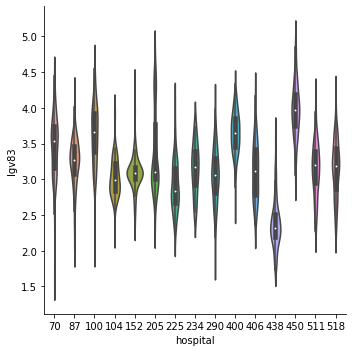

In [122]:
g  = sns.catplot(x="hospital",y="lgv83",data=train,kind="violin")

g = g.set_ylabels("lgv83")

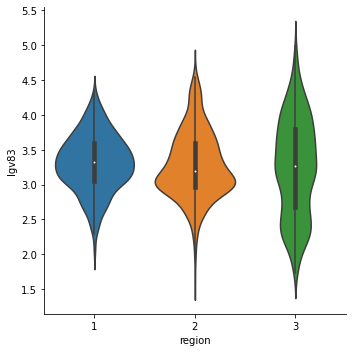

In [121]:
# Explore hospital feature vs lgv83
g  = sns.catplot(x="region",y="lgv83",data=train,kind="violin")

g = g.set_ylabels("lgv83")

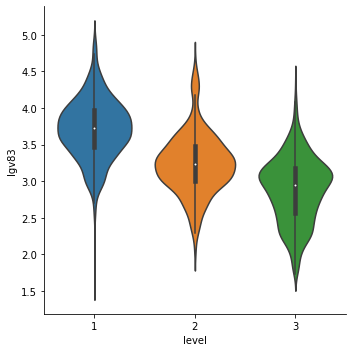

In [123]:
g  = sns.catplot(x="level",y="lgv83",data=train,kind="violin")

g = g.set_ylabels("lgv83")

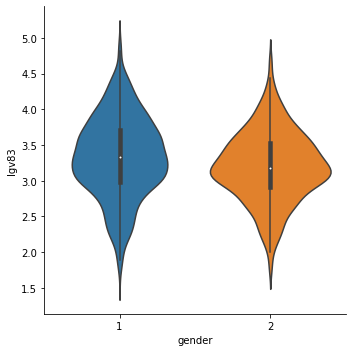

In [124]:
g  = sns.catplot(x="gender",y="lgv83",data=train,kind="violin")

g = g.set_ylabels("lgv83")

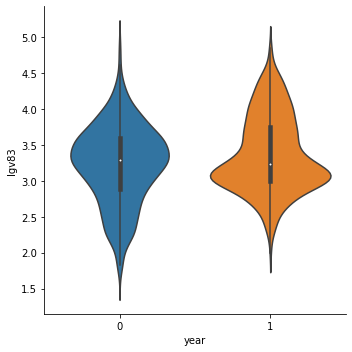

In [125]:
g  = sns.catplot(x="year",y="lgv83",data=train,kind="violin")

g = g.set_ylabels("lgv83")

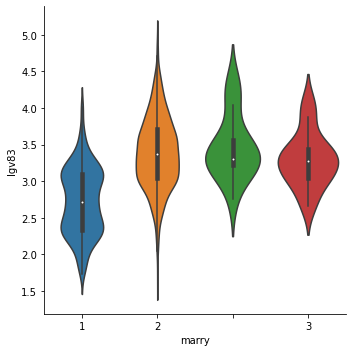

In [126]:
g  = sns.catplot(x="marry",y="lgv83",data=train,kind="violin")

g = g.set_ylabels("lgv83")

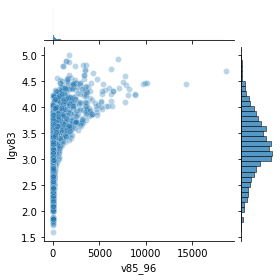

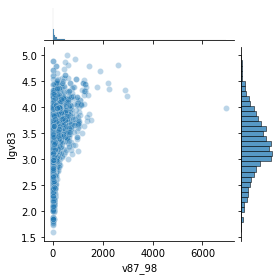

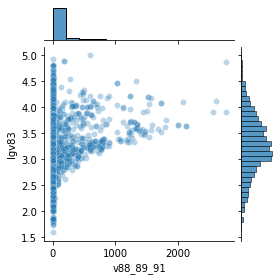

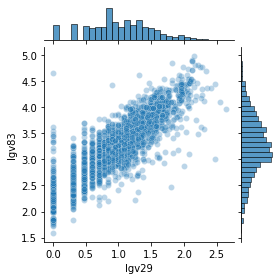

In [105]:
continuous_cols  = ['v85_96', 'v87_98', 'v88_89_91', 'lgv29']

for col in continuous_cols:
    sns.jointplot(x=col, y="lgv83", data=train, alpha=0.3, size=4)

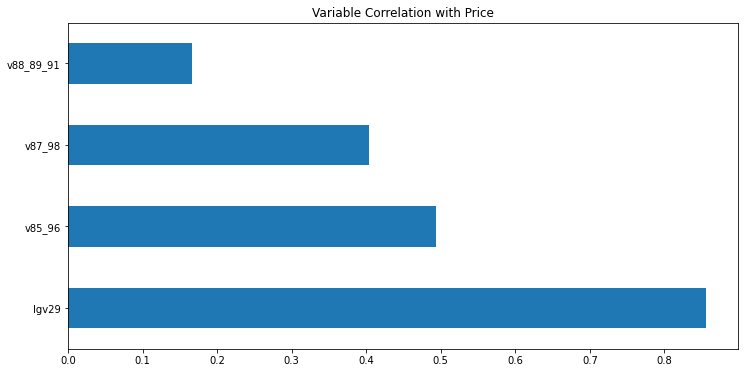

In [108]:
plt.figure(figsize=(12, 6))
train.corr()['lgv83'][continuous_cols].sort_values(ascending=False).plot(kind='barh', figsize=(12, 6), title='Variable Correlation with Price'
)
plt.show()

In [109]:
#检查相关性
matrix=train.corr()
print(matrix)

             hospital        region         level      year    gender  \
hospital     1.000000  5.959742e-01  1.746306e-02  0.133352 -0.104898   
region       0.595974  1.000000e+00 -9.105062e-16  0.169033 -0.068358   
level        0.017463 -9.105062e-16  1.000000e+00  0.057927  0.043075   
year         0.133352  1.690332e-01  5.792711e-02  1.000000 -0.009280   
gender      -0.104898 -6.835841e-02  4.307516e-02 -0.009280  1.000000   
v26          0.029549 -1.240162e-03  6.696877e-02 -0.020320 -0.037063   
v46         -0.020216  3.289436e-02 -2.192957e-03 -0.043455 -0.028521   
v55          0.208460  1.158089e-01  2.032816e-02 -0.086278 -0.057935   
v52         -0.159043 -9.572433e-02  1.765582e-01 -0.063723  0.031569   
v53          0.044375  6.657935e-02 -1.083546e-01 -0.196589 -0.018238   
v73         -0.141590 -1.600756e-01 -1.040492e-01  0.108748  0.029377   
v74         -0.097203 -9.964232e-02  1.015585e-01 -0.006540  0.048962   
v75          0.052243 -1.393340e-02 -6.966698e-02  

<AxesSubplot:>

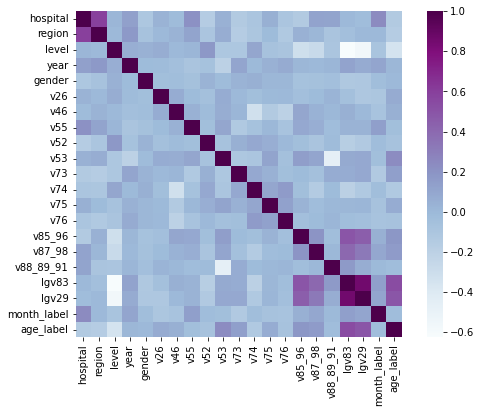

In [111]:
#可视化相关性
f,ax=plt.subplots(figsize=(9,6))#9*6的图
sns.heatmap(matrix,vmax=1,cmap='BuPu',square=True)#vmax表示最大上届，cmap="BuPu"可选从数据值到色彩空间的映射
# annot : 如果为True，则将数据值写入每个单元格中

In [187]:
train.drop('hospital',axis=1)

,region,level,year,gender,v26,v46,v55,v52,v53,v73,...,marry_2,marry_3,v20_,v20_1,v20_2,v20_3,v56_,v56_1,v56_2,v56_3
0,1,3,0,2,1,0,2,2,2,2,...,0,0,0,0,0,1,0,0,1,0
1,3,3,0,2,1,0,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,3,3,0,1,1,0,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
3,3,3,0,1,1,0,3,2,2,1,...,0,0,0,0,0,1,0,1,0,0
4,3,3,0,1,1,0,3,2,2,2,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,1,0,1,1,0,3,1,2,2,...,1,0,0,0,1,0,0,1,0,0
2669,1,3,1,1,2,0,2,2,2,2,...,1,0,0,0,0,1,0,0,1,0
2670,3,1,1,1,2,0,3,1,2,2,...,1,0,0,1,0,0,0,1,0,0
2671,1,2,0,2,2,0,3,2,2,2,...,1,0,0,1,0,0,0,0,1,0


4.聚类分析

In [166]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
#创建pca降维对象
pca = PCA(n_components=2)
# fit_transform
me = pca.fit_transform(train)
me.shape


(2673, 2)

In [188]:
pca_importance=abs(pca.components_)
print(pca_importance*1)

[[2.03032295e-02 3.24610808e-05 2.31381807e-04 4.58512691e-06
  2.89588359e-05 1.46357141e-05 1.93721058e-05 5.83547437e-05
  7.71367009e-06 4.64977241e-05 3.04300415e-06 7.77542457e-06
  1.12991000e-05 6.03715031e-06 9.98366118e-01 5.26931294e-02
  8.72257945e-03 2.45037584e-04 2.02860055e-04 5.04563766e-05
  2.16148975e-04 7.68834770e-10 5.23245600e-05 5.37423186e-05
  1.41852742e-06 2.18071410e-07 4.52010781e-06 2.68311117e-05
  2.20929325e-05 1.28303808e-07 5.10402475e-05 5.03044373e-05
  6.07506359e-07]
 [1.25262651e-01 1.13253928e-04 4.74497647e-04 4.95345793e-05
  1.11040645e-04 2.79326147e-05 1.14586370e-05 2.53510932e-05
  4.16254233e-05 4.86032707e-04 4.11575290e-05 4.98576797e-05
  4.84791479e-06 3.64113252e-06 6.01981283e-03 3.17885796e-01
  9.39798251e-01 5.17805480e-04 2.58155547e-04 1.57045093e-04
  6.98137942e-05 1.45022948e-06 2.73607298e-05 2.81591235e-05
  2.24862314e-06 1.15795669e-06 2.36059697e-05 9.23160111e-05
  1.17079938e-04 3.95029258e-07 8.00431957e-05 7.939

In [168]:
x_train1 = me[:1000]
x_test1 = me[1000:1300]
x_train1 = me[:1000]
x_test1 = me[1000:1300]
km = KMeans(n_clusters=4)
# 只需要添加特征数据
km.fit(x_train1)

KMeans(n_clusters=4)

In [155]:
example = km.predict(x_test1)
example

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 1, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1])

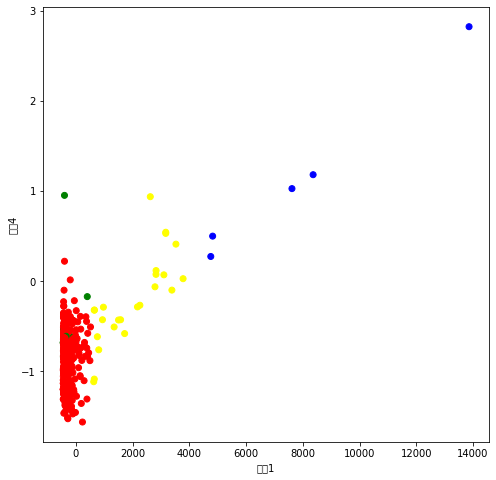

In [156]:
plt.figure(figsize=(8,8))
colors = ["red","yellow","green","blue"]
colored = [colors[i] for i in example]
plt.scatter(x_test1[:, 0],x_test1[:, 4], color=colored)
plt.xlabel("特征1")
plt.ylabel("特征4")
plt.show()

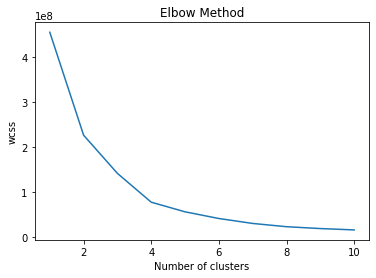

In [169]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x_train1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [170]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(x_train1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_train1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9105948924229255
For n_clusters=3, The Silhouette Coefficient is 0.8169903420041286
For n_clusters=4, The Silhouette Coefficient is 0.714806308044064
For n_clusters=5, The Silhouette Coefficient is 0.6873778821598744
For n_clusters=6, The Silhouette Coefficient is 0.7024673546398904
For n_clusters=7, The Silhouette Coefficient is 0.7034881475191078
For n_clusters=8, The Silhouette Coefficient is 0.7025204423733065
For n_clusters=9, The Silhouette Coefficient is 0.6352095040768351
For n_clusters=10, The Silhouette Coefficient is 0.6205289115380538


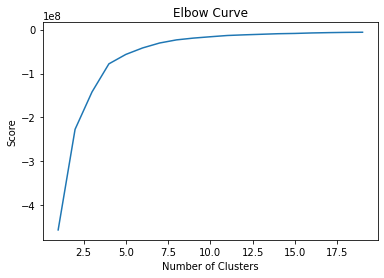

[-456103269.0229023, -227017578.40608826, -142052854.74222362, -77956268.8218894, -56520913.787820734, -41656557.73280845, -30484144.90479961, -23369292.924402382, -19312237.50580397, -16267856.797701038, -13409330.219181398, -11897422.979545336, -10638106.077751234, -9357060.484664582, -8698140.320396304, -7595223.787019517, -6865779.244184687, -6318875.027235861, -5991329.989170225]


In [171]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_train1).score(x_train1) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [172]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x_train1)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 456103269.0229023
k: 2  cost: 227017578.4060883
k: 3  cost: 142052854.74222365
k: 4  cost: 77956268.8218894
k: 5  cost: 56520913.787820734
k: 6  cost: 41643029.973277345
k: 7  cost: 30484144.90479961
k: 8  cost: 23398302.13162481
k: 9  cost: 19287687.12549275
k: 10  cost: 16273887.694721298



In [173]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(x_train1)

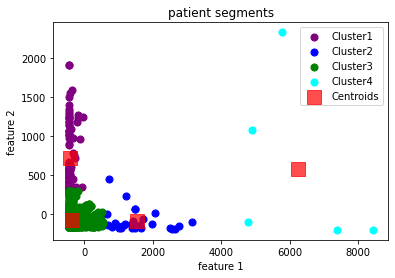

In [174]:
#Visualising the clusters for k=4
plt.scatter(x_train1[y_means==0,0],x_train1[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(x_train1[y_means==1,0],x_train1[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x_train1[y_means==2,0],x_train1[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(x_train1[y_means==3,0],x_train1[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('patient segments')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

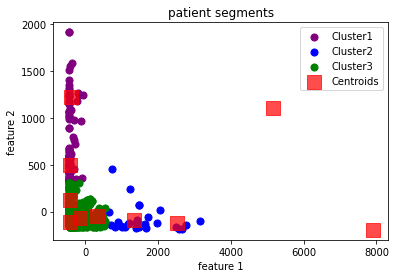

In [190]:
#Visualising the clusters
plt.scatter(x_train1[y_means==0,0],x_train1[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(x_train1[y_means==1,0],x_train1[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x_train1[y_means==2,0],x_train1[y_means==2,1],s=50, c='green',label='Cluster3')




plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('patient segments')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

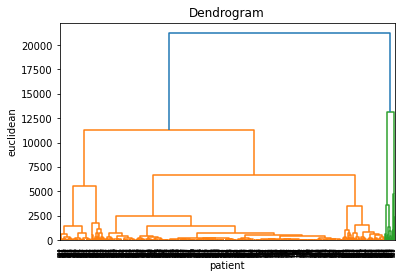

In [184]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(x_train1, method='ward'))
plt.title("Dendrogram")
plt.xlabel('patient')
plt.ylabel('euclidean')
plt.show()

5.回归预测

In [195]:
train=train.drop('hospital',axis=1)

KeyError: "['hospital'] not found in axis"

In [196]:
train.head()

,region,level,year,gender,v26,v46,v55,v52,v53,v73,...,marry_2,marry_3,v20_,v20_1,v20_2,v20_3,v56_,v56_1,v56_2,v56_3
0,1,3,0,2,1,0,2,2,2,2,...,0,0,0,0,0,1,0,0,1,0
1,3,3,0,2,1,0,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,3,3,0,1,1,0,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
3,3,3,0,1,1,0,3,2,2,1,...,0,0,0,0,0,1,0,1,0,0
4,3,3,0,1,1,0,3,2,2,2,...,0,0,0,0,0,1,0,1,0,0


In [197]:
#设置目标变量和特征
X=train.drop('lgv83', axis=1)#特征
Y=train.lgv83 #目标

X.shape,Y.shape

((2673, 31), (2673,))

In [198]:
#第一步划分训练集测试集 
#建模用sklearn
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,Y,test_size=0.3,random_state=0)
# random_state就是为了保证程序每次运行都分割一样的训练集和测试集
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape

((1871, 31), (1871,), (802, 31), (802,))

In [214]:
def try_different_method(model):
    model.fit(x_train,y_train)
    score = model.score(x_cv, y_cv)
    result = model.predict(x_cv)
    plt.figure()
    plt.plot(np.arange(len(result)), y_cv,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()


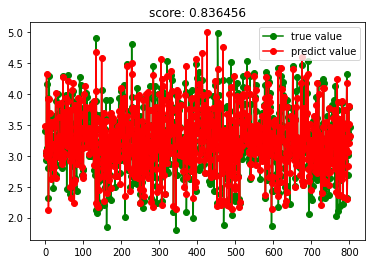

In [215]:
#岭回归
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(x_train, y_train)
try_different_method(reg)

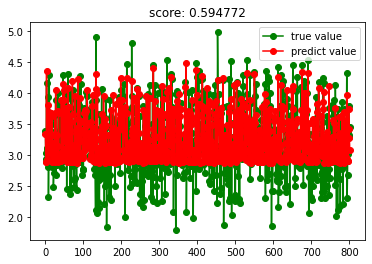

In [201]:
#svr
from sklearn import svm
regsvr = svm.SVR()
regsvr.fit(x_train,y_train)
try_different_method(regsvr)

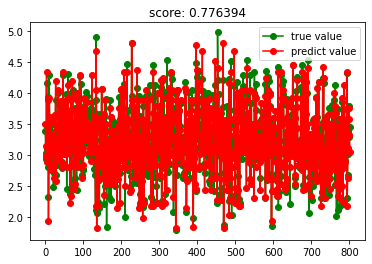

In [217]:
#决策树回归
from sklearn import tree
dtreg = tree.DecisionTreeRegressor(criterion="squared_error",max_depth=10)
dtreg.fit(x_train,y_train)
try_different_method(dtreg)

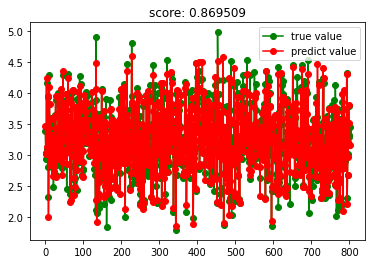

In [219]:
#随机森林
from sklearn import ensemble
rfreg = ensemble.RandomForestRegressor(n_estimators=50,max_depth=20)
rfreg.fit(x_train,y_train)
try_different_method(rfreg)

<AxesSubplot:>

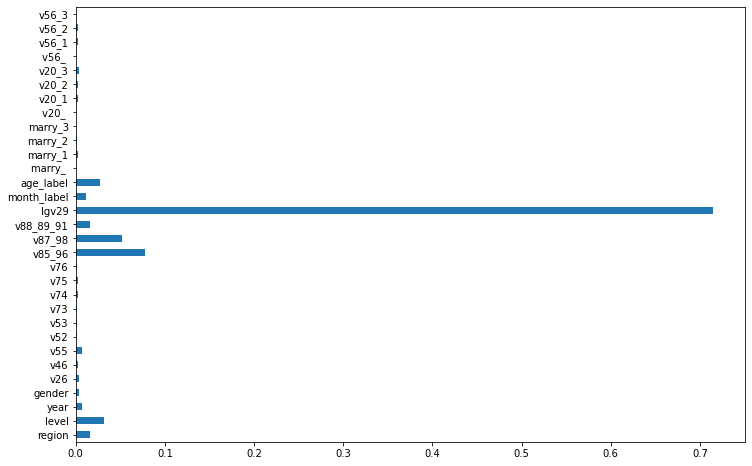

In [209]:
importances=pd.Series(rfreg.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

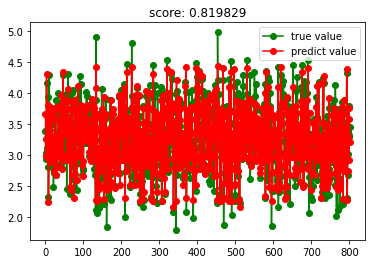

In [210]:
#Adaboost回归
from sklearn import ensemble
adareg = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
adareg.fit(x_train,y_train)
try_different_method(adareg)

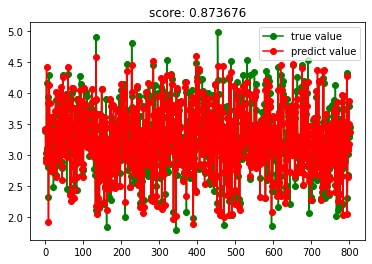

In [211]:
from xgboost import XGBRegressor
xgreg = XGBRegressor(n_estimators=50)#这里使用50个决策树
xgreg.fit(x_train,y_train)
try_different_method(xgreg)